# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pycountry
from scipy.stats import linregress

# Get today's date
d = datetime.datetime.today()
date = d.strftime('%m-%d-%Y')
print(f"Today is {date}")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Today is 01-22-2020


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countrycode = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    countryobj = pycountry.countries.get(alpha_2=countrycode.upper())
    country = countryobj.name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        # break at 600 so hopefully we have 500 that hit on the weather api
        if len(cities) == 600:
            break

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initialize empty dataframe
cityWeatherDF = pd.DataFrame()

# loop through the cities list to get the information and append to main dataframe
for city, country in zip(cities,countries):
    response = requests.get(f"{query_url}{city},{country}").json()
    try:
        respDF = pd.DataFrame({"City":[city],
                               "Country":country,
                           "Cloudiness":response['clouds']['all'],
                           'Date':response['dt'],
                           'Humidity':response['main']['humidity'],
                           'Lat':response['coord']['lat'],
                           'Lng':response['coord']['lon'],
                           'Max Temp':response['main']['temp_max'],
                           'Wind Speed':response['wind']['speed']
                          })
        
        cityWeatherDF = cityWeatherDF.append(respDF, ignore_index=True)
        print(f"Done with {city},{country} number {cities.index(city) + 1} of {len(cities)}")
    except (KeyError):
        print(f"Can't find {city}, {country}. Skipping city")

Done with bengkulu,Indonesia number 1 of 600
Done with broken hill,Australia number 2 of 600
Done with ellisras,South Africa number 3 of 600
Can't find mys shmidta, Russian Federation. Skipping city
Done with ushuaia,Argentina number 5 of 600
Done with hobart,Australia number 6 of 600
Done with parrita,Costa Rica number 7 of 600
Done with hofn,Iceland number 8 of 600
Done with beberibe,Brazil number 9 of 600
Done with arman,Russian Federation number 10 of 600
Can't find taolanaro, Madagascar. Skipping city
Done with smithers,Canada number 12 of 600
Done with albany,Australia number 13 of 600
Done with ust-nera,Russian Federation number 14 of 600
Done with chuy,Uruguay number 15 of 600
Done with rocha,Uruguay number 16 of 600
Done with rio gallegos,Argentina number 17 of 600
Done with altamont,United States number 18 of 600
Done with ponta do sol,Portugal number 19 of 600
Done with nanortalik,Greenland number 20 of 600
Done with merauke,Indonesia number 21 of 600
Done with kruisfontein,

Done with zacualpan,Mexico number 170 of 600
Done with pevek,Russian Federation number 171 of 600
Done with luyang,China number 172 of 600
Done with cabo san lucas,Mexico number 173 of 600
Done with upernavik,Greenland number 174 of 600
Can't find crab hill, Barbados. Skipping city
Done with maceio,Brazil number 176 of 600
Done with tortoli,Italy number 177 of 600
Can't find urtaaul, Uzbekistan. Skipping city
Done with bambous virieux,Mauritius number 179 of 600
Done with shingu,Japan number 180 of 600
Done with aden,Yemen number 181 of 600
Done with salina,United States number 182 of 600
Done with kendari,Indonesia number 183 of 600
Done with dikson,Russian Federation number 184 of 600
Done with lorengau,Papua New Guinea number 185 of 600
Done with gouyave,Grenada number 186 of 600
Done with mar del plata,Argentina number 187 of 600
Done with nevel,Russian Federation number 188 of 600
Done with fort payne,United States number 189 of 600
Done with mende,France number 190 of 600
Done wi

Can't find ust-kamchatsk, Russian Federation. Skipping city
Done with sangar,Russian Federation number 342 of 600
Can't find santa eulalia del rio, Spain. Skipping city
Done with alihe,China number 344 of 600
Done with beyneu,Kazakhstan number 345 of 600
Done with sibolga,Indonesia number 346 of 600
Done with sabha,Jordan number 347 of 600
Done with khanpur,Pakistan number 348 of 600
Done with beloha,Madagascar number 349 of 600
Done with sharkan,Russian Federation number 350 of 600
Done with asau,Tuvalu number 351 of 600
Done with roald,Norway number 352 of 600
Done with amuntai,Indonesia number 353 of 600
Done with prachuap khiri khan,Thailand number 354 of 600
Done with yerbogachen,Russian Federation number 355 of 600
Done with port hedland,Australia number 356 of 600
Done with saint-augustin,Canada number 357 of 600
Done with turkan,Azerbaijan number 358 of 600
Done with whyalla,Australia number 359 of 600
Done with namibe,Angola number 360 of 600
Done with penzance,United Kingdom 

Done with marsh harbour,Bahamas number 510 of 600
Done with mednogorsk,Russian Federation number 511 of 600
Done with jishui,China number 512 of 600
Done with chifeng,China number 513 of 600
Done with oban,United Kingdom number 514 of 600
Done with manta,Ecuador number 515 of 600
Done with kushiro,Japan number 516 of 600
Done with fort-shevchenko,Kazakhstan number 517 of 600
Done with teguise,Spain number 518 of 600
Done with kanniyakumari,India number 519 of 600
Done with sakaiminato,Japan number 520 of 600
Can't find dzhusaly, Kazakhstan. Skipping city
Done with nikolayevsk-na-amure,Russian Federation number 522 of 600
Done with dumka,India number 523 of 600
Can't find sorvag, Faroe Islands. Skipping city
Done with port-de-bouc,France number 525 of 600
Done with homnabad,India number 526 of 600
Done with baruun-urt,Mongolia number 527 of 600
Done with beringovskiy,Russian Federation number 528 of 600
Done with puchov,Slovakia number 529 of 600
Done with meulaboh,Indonesia number 530 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityWeatherDF.to_csv("Data/CityWeatherData.csv")
cityWeatherDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bengkulu,Indonesia,78,1579747575,65,-3.80,102.27,85.17,3.33
1,broken hill,Australia,40,1579747575,27,-31.95,141.43,78.80,18.34
2,ellisras,South Africa,0,1579747575,70,-23.66,27.74,69.31,9.60
3,ushuaia,Argentina,75,1579747469,76,-54.80,-68.30,48.20,8.05
4,hobart,Australia,40,1579747576,59,-42.88,147.33,64.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

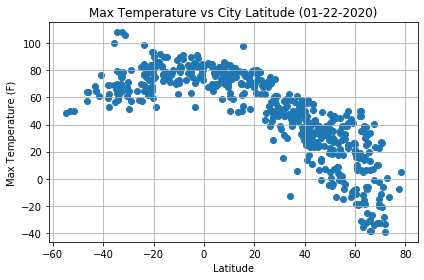

In [5]:
# set x and y values
lat = cityWeatherDF['Lat']
temp = cityWeatherDF['Max Temp']

# plot
plt.scatter(lat,temp)
# label the figure
plt.title(f"Max Temperature vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/MaxTemperatureVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Max Temperature of that city.
#### It shows that the closer to the equator the warmer the temperature is.  
#### Expecially in the northern hemisphere the temperature gets colder the further you get from the equator

#### Latitude vs. Humidity Plot

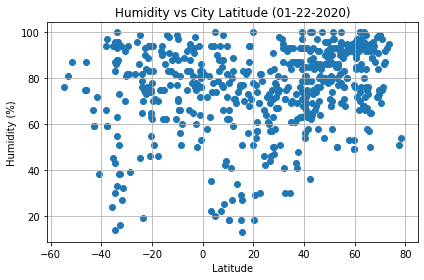

In [7]:
# set x and y values
humid = cityWeatherDF['Humidity']

# plot
plt.scatter(lat,humid)
# label the figure
plt.title(f"Humidity vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/HumidityVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Humidity of that city.
#### It shows that the closer to the equator the lower the humidity is overall.

#### Latitude vs. Cloudiness Plot

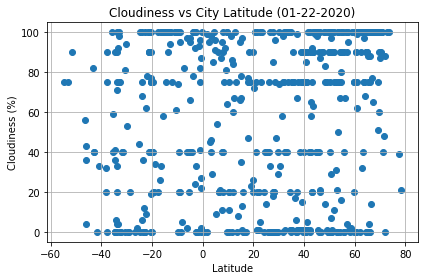

In [9]:
# set x and y values
cloud = cityWeatherDF['Cloudiness']

# plot
plt.scatter(lat,cloud)
# label the figure
plt.title(f"Cloudiness vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/CloudinessVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Cloudiness of that city.
#### There's not a lot that this plot shows.  
#### It mainly shows that latitude doesn't have a huge effect on cloudiness.

#### Latitude vs. Wind Speed Plot

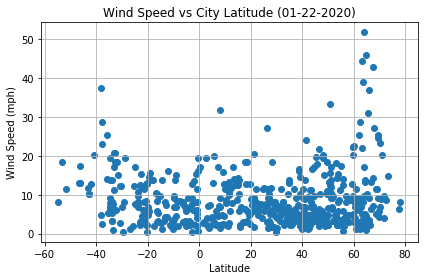

In [11]:
# set x and y values
windspd = cityWeatherDF['Wind Speed']

# plot
plt.scatter(lat,windspd)
# label the figure
plt.title(f"Wind Speed vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/WindSpeedVsCityLatitude")

### Summary
#### The above code plots a figure that compares City Latitude and the Wind Speed of that city.
#### It shows that the closer to the equator the lower the wind speed is on average.
#### There are some extreme values in the northern latitudes

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregressplot(xvalues,yvalues,title,xlabel,ylabel):  
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    rsqvalue = rvalue**2
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot scatter and linear regression
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    
    # annotate and label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(min(xvalues) + 1,min(yvalues)+8),fontsize=12,color="red")
    plt.annotate(f"The r-squared is: {round(rsqvalue,4)}",(min(xvalues) + 1,min(yvalues)+1),fontsize=12,color="red")
    plt.grid()
    plt.tight_layout()
    print(f"The r-squared is {rsqvalue}")
    

In [14]:
# Create Northern and Southern Hemisphere DataFrames
cityWeatherNHemDF = cityWeatherDF[cityWeatherDF['Lat'] > 0]
cityWeatherSHemDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
cityWeatherSHemDF.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bengkulu,Indonesia,78,1579747575,65,-3.80,102.27,85.17,3.33
1,broken hill,Australia,40,1579747575,27,-31.95,141.43,78.80,18.34
2,ellisras,South Africa,0,1579747575,70,-23.66,27.74,69.31,9.60
3,ushuaia,Argentina,75,1579747469,76,-54.80,-68.30,48.20,8.05
4,hobart,Australia,40,1579747576,59,-42.88,147.33,64.40,10.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6972877193275775


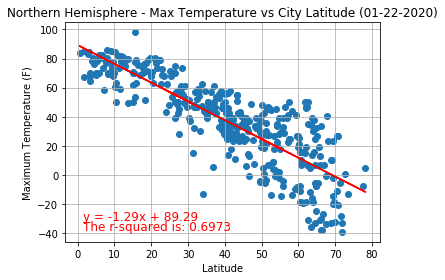

In [15]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Max Temp'],f"Northern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/NorthernHemisphereMaxTempVsCityLatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.22454281612196308


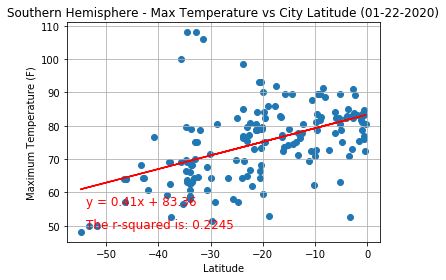

In [16]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Max Temp'],f"Southern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/SouthernHemisphereMaxTempVsCityLatitude.png")

### Summary
#### The trends in the northern hemisphere are more pronounced than those in the southern hemisphere
#### In both hemispheres the closer to the equator the warmer it is

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.13122544266785172


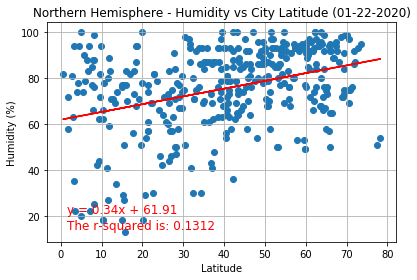

In [17]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Humidity'],f"Northern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/NorthernHemisphereHumidityVsCityLatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.03542310963298203


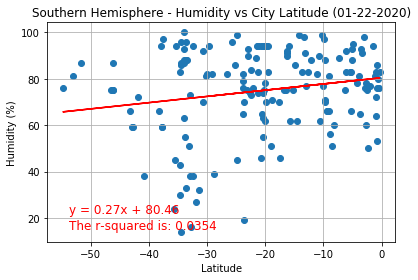

In [18]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Humidity'],f"Southern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/SouthernHemisphereHumidityVsCityLatitude.png")

### Summary
#### There was not a pronounced relationship in either hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.04388483982659109


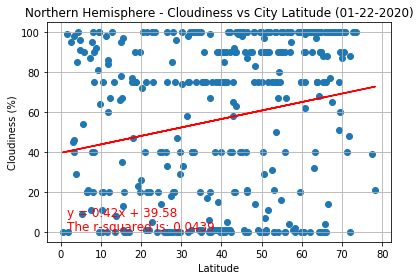

In [19]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/NorthernHemisphereCloudinessVsCityLatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.02501888425829283


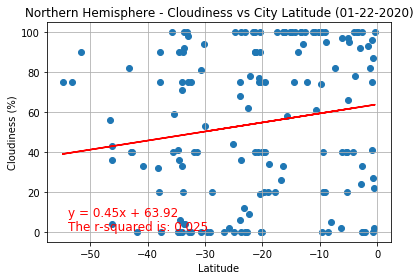

In [20]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/SouthernHemisphereCloudinessVsCityLatitude.png")

### Summary
#### There is not a pronounced relationship in either hemisphere
#### On average the more north you go in either hemisphere the more cloudy it is

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.02833269042020166


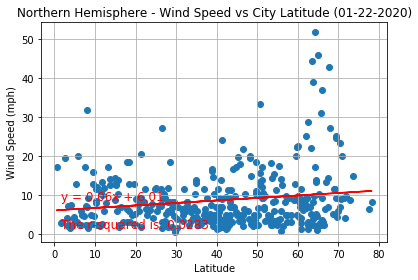

In [21]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/NorthernHemisphereWindSpeedVsCityLatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.134258814291014


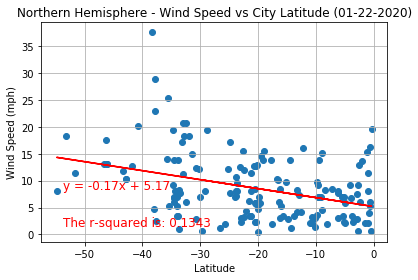

In [22]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/SouthernHemisphereWindSpeedVsCityLatitude.png")

### Summary
#### The farther from the equator the higher the average wind speed
#### There are some outliers around -35 and 65 degrees latitude


# Oberservations

### The closer to the equator the latitude is the higher the average temperature is in most cities
### The above trend is more prominent in the northern hemisphere
### The closer to the equator the higher the humidity is in most cities
### Of the four weather characteristics investigated, temperature had the highest correlation to latitude